In [1]:
%matplotlib inline
# importamos la triada de Data Science
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# importamos scipy.stats que ayudará a generar distribuciones
import scipy.stats as stats
# importamos seaborn, siguiendo la convención de renombrarlo como sns
import seaborn as sns
# archivo con funciones de visualización
import lec4_graphs as gfx
# evitar warnings y deprecaciones
import warnings
warnings.filterwarnings(action="ignore")
plt.style.use('seaborn') # gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (6,4) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 200 # resolución gráficos

1. Evaluar juicios de hipótesis (2 puntos): para evaluar la pertinencia de diversas
hipótesis, se te solicita discernir si es posible rechazar la hipótesis nula.

● 75 individuos elegidos al azar fueron alcanzados por activistas pro-LGTB que se
identificaron como homosexuales, y 75 alcanzados por activistas pro-LGTB que se
identificaron como heterosexuales. El objetivo era medir actitudes frente a la
adopción homoparental. La organización encargada de procesar los datos obtuvo los siguientes resultados:

○ El 67% de los encuestados por heterosexuales se mostró a favor de la
adopción homoparental, mientras que un 72% de los encuestados por
activistas que se identificaron como homosexuales se mostraron a favor de la adopción homoparental.

○ Asumiendo que la hipótesis nula es que ambos porcentajes no son
diferentes, y la hipótesis alternativa es que existe una diferencia substancial entre ambos.

○ Con p-valor de 0.1183 ¿es posible rechazar la hipótesis nula en favor de la alternativa con una confianza de 95%?, 
Respuesta= Falla en rechazar la hipótesis nula, el p_value tendria que ser menor a 0,025 para que se rechace la hipotesis nula.
¿Cuanta es la confianza máxima con la que sería posible rechazar la hipótesis nula en favor de la alternativa con estos resultados?
Respuesta= 99% sería a confianza maxima con la que seria posible rechazar la hipotesis nula



Paso 1.Definir enunciados de Hipótesis

la hipótesis nula es que ambos porcentajes no son diferentes
la hipótesis alternativa es que existe una diferencia substancial entre ambos

Paso2. Definir Estadistico de prueba


Paso3. Definir una distribucion de la hipotesis nula
Paso4. Definir un puntaje de corte

2. Importar la base de datos utilizada la sesión presencial anterior (2 puntos):
● Agregue una serie de variables binarias por cada continente de la variable
region.
Tip: Utilice np.where para ello.
● De manera similar a la sesión anterior, enfóquese en las siguientes variables:
○ Apellidos desde la A hasta la N: Enfocarse en las variables chldmort,
adfert y life.
○ Apellidos desde la N hasta la Z: Enfocarse en las variables femlab,
literacy y school.


In [2]:
df = pd.read_csv('./nations.csv',encoding= 'iso-8859-1', index_col=0) #Tambien se puede utilizar ek 'latin-1', index_col=0 se usa para quitar la columna unnamed
df

,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.00,NaN
2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.20,NaN
3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.20,NaN
4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.20,NaN
5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.10,33.299999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Samoa,Oceania,4012.600098,10.300000,28.299999,26.75,71.533333,181600,20.666668,0.5010,98.800003,3.10,NaN
191,Solomon Islands,Oceania,2249.199951,4.500000,70.300003,36.00,66.500000,503617,17.766666,0.4858,NaN,1.40,NaN
192,Tonga,Oceania,4072.199951,10.133333,22.299999,19.25,71.833336,102550,23.266666,0.7150,99.000000,4.85,NaN
193,Tuvalu,Oceania,NaN,NaN,23.299999,36.50,66.033333,9767,49.233334,NaN,NaN,NaN,NaN


In [22]:
var_all = ['country','region']
var_AN = ['chldmort', 'adfer', 'life']
var_MZ = ['femlab', 'literacy', 'school']

region = ['Africa','Asia','Europe','Americas','Oceania']

df_subset = df.loc[:,var_all+var_MZ]

In [35]:
#Primero definimos las muestras independientes
#femlab, literacy y school.
#definimos una nueva variable binaria:
df_subset['Africa'] = np.where(df_subset['region'] == 'Africa',1,0) 
df_subset['Oceania'] = np.where(df_subset['region'] == 'Oceania',1,0) 
df_subset['Americas'] = np.where(df_subset['region'] == 'Americas',1,0) 
df_subset['Europa'] = np.where(df_subset['region'] == 'Europe',1,0) 
df_subset['Asia'] = np.where(df_subset['region'] == 'Asia',1,0) 

region = ['Africa','Asia','Europa','Americas','Oceania']
df_subset

,country,region,femlab,literacy,school,Africa,Oceania,America,Europa,Asia,Americas
1,Algeria,Africa,0.4522,72.599998,6.716667,1,0,0,0,0,0
2,Benin,Africa,0.8482,41.700001,3.100000,1,0,0,0,0,0
3,Botswana,Africa,0.8870,84.099998,8.600000,1,0,0,0,0,0
4,Burkina Faso,Africa,0.8584,23.600000,1.300000,1,0,0,0,0,0
5,Burundi,Africa,1.0344,66.599998,2.483333,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
190,Samoa,Oceania,0.5010,98.800003,10.300000,0,1,0,0,0,0
191,Solomon Islands,Oceania,0.4858,NaN,4.500000,0,1,0,0,0,0
192,Tonga,Oceania,0.7150,99.000000,10.133333,0,1,0,0,0,0
193,Tuvalu,Oceania,NaN,NaN,NaN,0,1,0,0,0,0


Text(0, 0.5, 'Cantidad de paises en cada región')

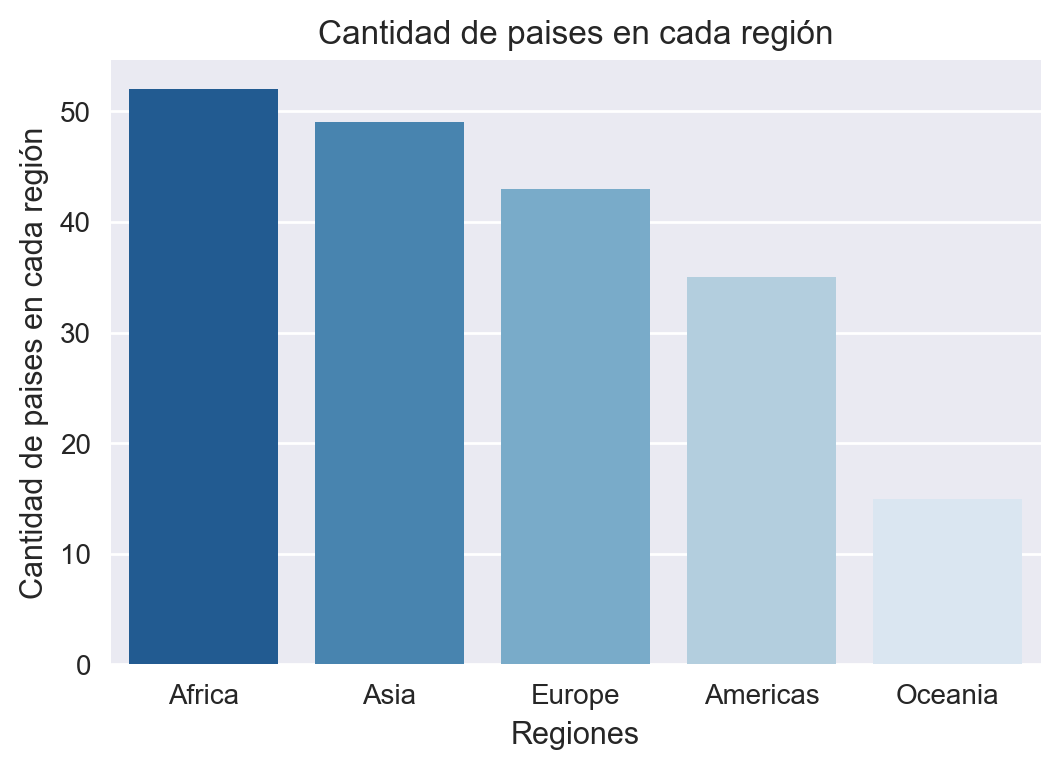

In [5]:
g = sns.countplot(x = df['region'], order = df['region'].value_counts().index, palette="Blues_r")
g.set_title('Cantidad de paises en cada región')
plt.xlabel('Regiones')  # Establece el título del eje x
plt.ylabel('Cantidad de paises en cada región') # Establece el título del eje y


In [10]:
#Probando
school_africa = df_subset.query('Africa == 1')['school'].dropna()
no_school_africa = df_subset.query('Africa == 0')['school'].dropna()
stats.ttest_ind(school_africa, no_school_africa)

Ttest_indResult(statistic=-10.415811831777058, pvalue=2.6352830456717332e-20)

In [11]:
school_africa.mean()- no_school_africa.mean()

-4.029435599500295

In [13]:
#Probando
femlab_oceania = df_subset.query('Oceania == 1')['femlab'].dropna()
no_femlab_oceania = df_subset.query('Oceania == 0')['femlab'].dropna()
stats.ttest_ind(femlab_oceania, no_femlab_oceania)

Ttest_indResult(statistic=0.5346624412260647, pvalue=0.5935619441213259)

In [14]:
femlab_oceania.mean()- no_femlab_oceania.mean()

0.033521042900189535

In [17]:
#Probando
literacy_africa = df_subset.query('Africa == 1')['literacy'].dropna()
no_literacy_africa = df_subset.query('Africa == 0')['literacy'].dropna()
stats.ttest_ind(literacy_africa, no_literacy_africa)

Ttest_indResult(statistic=-8.909991173873896, pvalue=3.3857112156459963e-15)

In [ ]:
3. Implementar una función de prueba de hipótesis a mano (3 puntos):
● La función debe ingresar los siguientes argumentos:
○ df: La tabla de datos.
○ variable: La variable a analizar.
○ binarize: El indicador binario a utilizar.
Tip:
❖ Separe la variable en dos, utilizando el indicador binario. Recuerde eliminar los
perdidos con dropna().
❖ Implemente ttest_ind de scipy.stats y guarde el valor t y pval.
❖ Reporte las medias para cada grupo (0 y 1).
❖ Reporte la diferencia de entre las medias.
❖ Reporte los valores t y p


In [36]:
def prueba_hipotesis (df,var,region):
    
    temp1 = df.loc[df_subset[region] == 1,var].dropna()
    temp0 = df.loc[df_subset[region] == 0,var].dropna()
    calculo = stats.ttest_ind(temp1,temp0)    
    t = calculo[0].round(2)
    p_value = calculo[1]
    media1 = round(temp1.mean(),2)
    media0 = round(temp0.mean(),2)
    dif = round((media1-media0),2)
    print(f'La media para {i} es {media1} y resto del mundo {media0}')
    print(f'La diferencia entre las medias es: {dif}')
    print(f'El valor de t es: {t} y el p_value es: {p_value}')
    print('--'*38)
    
for i in region:
    print(f'La datos para {i} son:\n') 
    
    prueba_hipotesis (df_subset,'femlab',i)

La datos para Africa son:

La media para Africa es 0.73 y resto del mundo 0.68
La diferencia entre las medias es: 0.05
El valor de t es: 1.78 y el p_value es: 0.0761771840435915
----------------------------------------------------------------------------
La datos para Asia son:

La media para Asia es 0.61 y resto del mundo 0.72
La diferencia entre las medias es: -0.11
El valor de t es: -3.75 y el p_value es: 0.00024413257519365062
----------------------------------------------------------------------------
La datos para Europa son:

La media para Europa es 0.77 y resto del mundo 0.67
La diferencia entre las medias es: 0.1
El valor de t es: 3.06 y el p_value es: 0.0025335604834548654
----------------------------------------------------------------------------
La datos para Americas son:

La media para Americas es 0.65 y resto del mundo 0.7
La diferencia entre las medias es: -0.05
El valor de t es: -1.37 y el p_value es: 0.1714745430099794
------------------------------------------------

In [40]:
 for i in region:
    print(f'La datos para {i} son:\n') 
    prueba_hipotesis (df_subset,'literacy',i)

La datos para Africa son:

La media para Africa es 65.31 y resto del mundo 90.2
La diferencia entre las medias es: -24.89
El valor de t es: -8.91 y el p_value es: 3.3857112156459963e-15
----------------------------------------------------------------------------
La datos para Asia son:

La media para Asia es 87.36 y resto del mundo 78.99
La diferencia entre las medias es: 8.37
El valor de t es: 2.33 y el p_value es: 0.021114460773250368
----------------------------------------------------------------------------
La datos para Europa son:

La media para Europa es 98.18 y resto del mundo 78.29
La diferencia entre las medias es: 19.89
El valor de t es: 4.72 y el p_value es: 5.935608765865936e-06
----------------------------------------------------------------------------
La datos para Americas son:

La media para Americas es 89.3 y resto del mundo 80.18
La diferencia entre las medias es: 9.12
El valor de t es: 1.95 y el p_value es: 0.05282297025501064
-------------------------------------

In [41]:
 for i in region:
    print(f'La datos para {i} son:\n') 
    prueba_hipotesis (df_subset,'school',i)

La datos para Africa son:

La media para Africa es 4.52 y resto del mundo 8.55
La diferencia entre las medias es: -4.03
El valor de t es: -10.42 y el p_value es: 2.6352830456717332e-20
----------------------------------------------------------------------------
La datos para Asia son:

La media para Asia es 7.26 y resto del mundo 7.53
La diferencia entre las medias es: -0.27
El valor de t es: -0.54 y el p_value es: 0.5923313578645574
----------------------------------------------------------------------------
La datos para Europa son:

La media para Europa es 10.42 y resto del mundo 6.63
La diferencia entre las medias es: 3.79
El valor de t es: 8.52 y el p_value es: 5.2091030233609194e-15
----------------------------------------------------------------------------
La datos para Americas son:

La media para Americas es 8.07 y resto del mundo 7.32
La diferencia entre las medias es: 0.75
El valor de t es: 1.36 y el p_value es: 0.17458464986808925
------------------------------------------

4. Implementar una función que grafique los histogramas para ambas muestras (3
puntos)
● Genere una función que devuelva un gráfico donde visualice los dos
histogramas cuando la variable es 1 y 0, respectivamente.
Tip: Refactorize la función incluyendo el método hist de matplotlib.pyplot.
Incluya los argumentos alpha y label.
● Para las tres variables de interés acorde a su grupo, analice las diferencias de
medias por cada continente, y posteriormente grafique. Concluya con los
principales resultados al respecto.

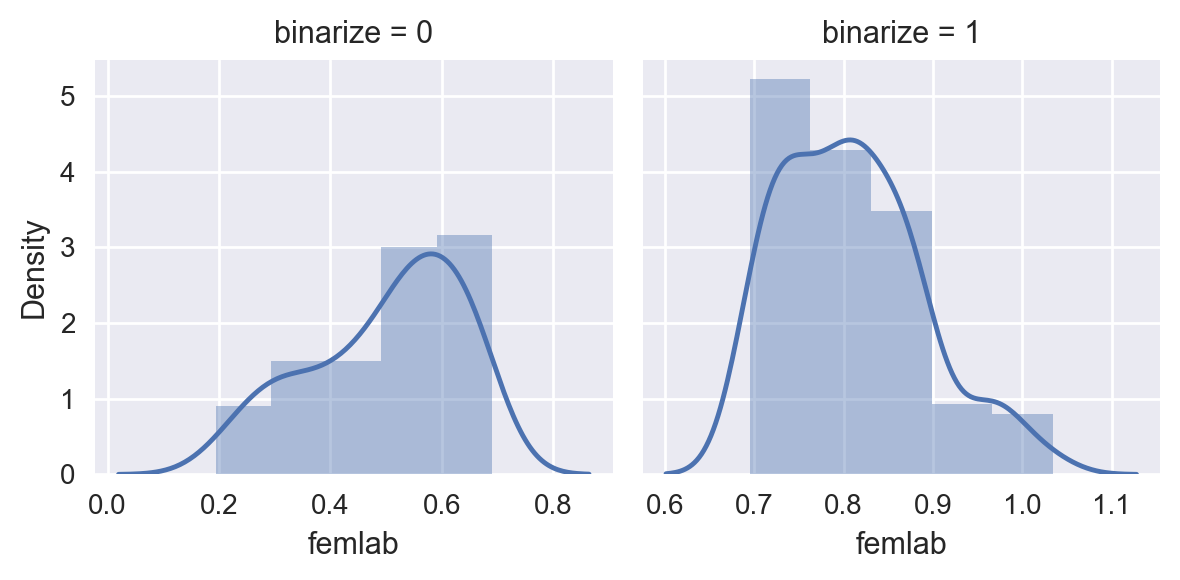

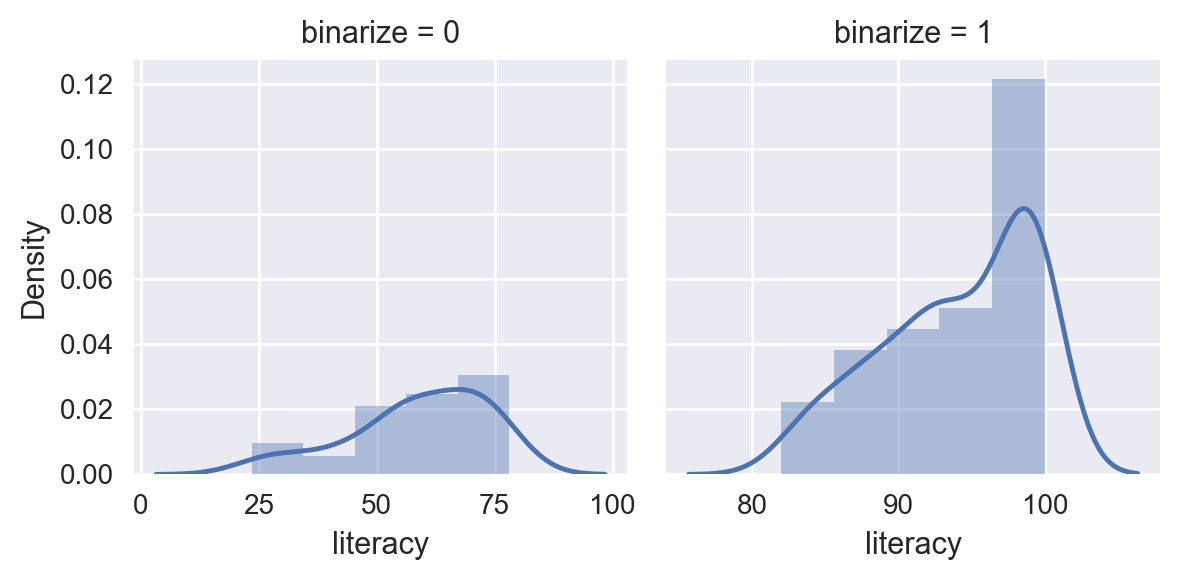

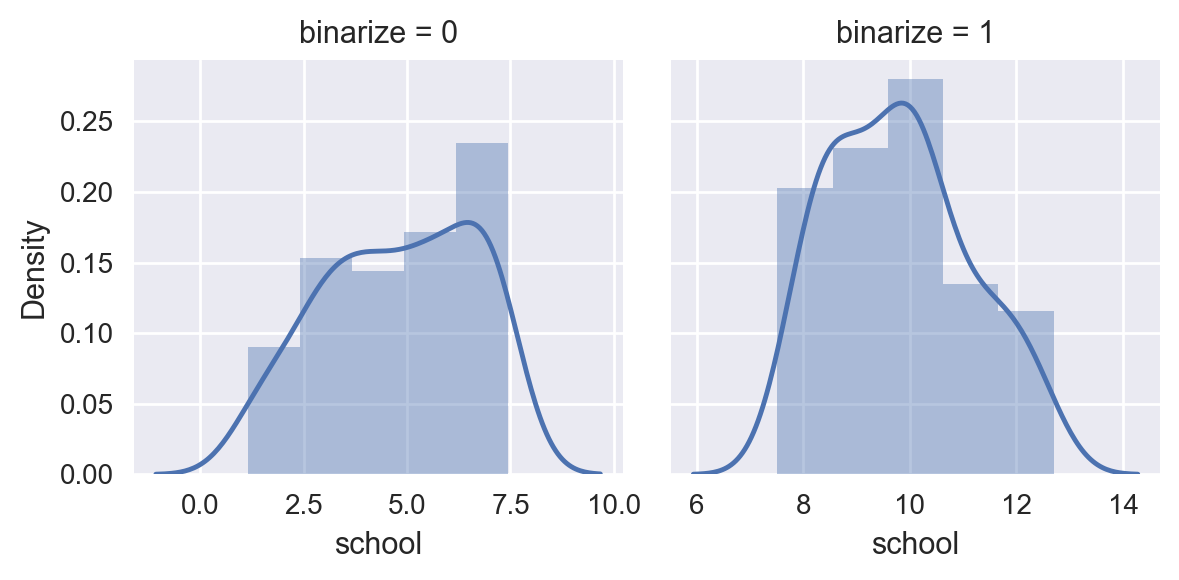

In [43]:
#Ahora utilizando seaborn para el mismo gráfico
def binarize_histogram_seaborn(df, var):
    tmp = df
    tmp['binarize'] = np.where(tmp[var] > np.mean(tmp[var]), 1,0)
    grid = sns.FacetGrid(tmp, col='binarize', col_wrap=2, sharex=False)
    grid.map(sns.distplot,var, bins=5)
    plt.show()
        
for i in var_MZ:
    binarize_histogram_seaborn(df_subset, i)